# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan pada proyek ini ialah terkait dengan dataset credit card fraud detection yang diperoleh dari Kaggle. Dataset ini berisikan data transaksi yang mengindikasikan apakah transaksi tersebut normal atau penipuan


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [29]:
# Loading Dataset from Kaggle
path = kagglehub.dataset_download("miadul/credit-card-fraud-detection-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/credit_card_fraud_10k.csv")
df.head()

Using Colab cache for faster access to the 'credit-card-fraud-detection-dataset' dataset.
Path to dataset files: /kaggle/input/credit-card-fraud-detection-dataset


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [31]:
df.isnull().sum()

,0
transaction_id,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [32]:
df.duplicated().sum()


np.int64(0)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

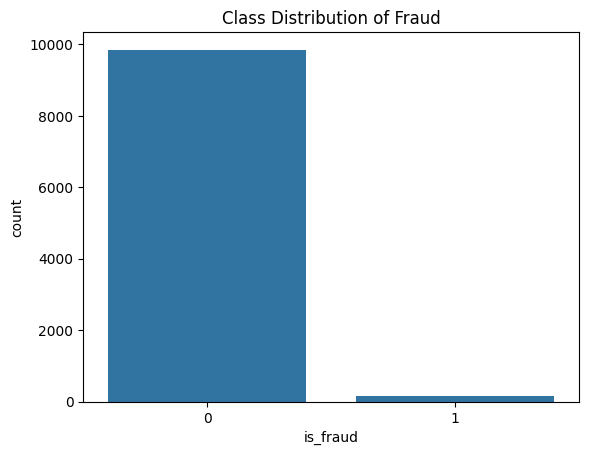

In [33]:
# Class Distribution
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution of Fraud')
plt.show()

In [34]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


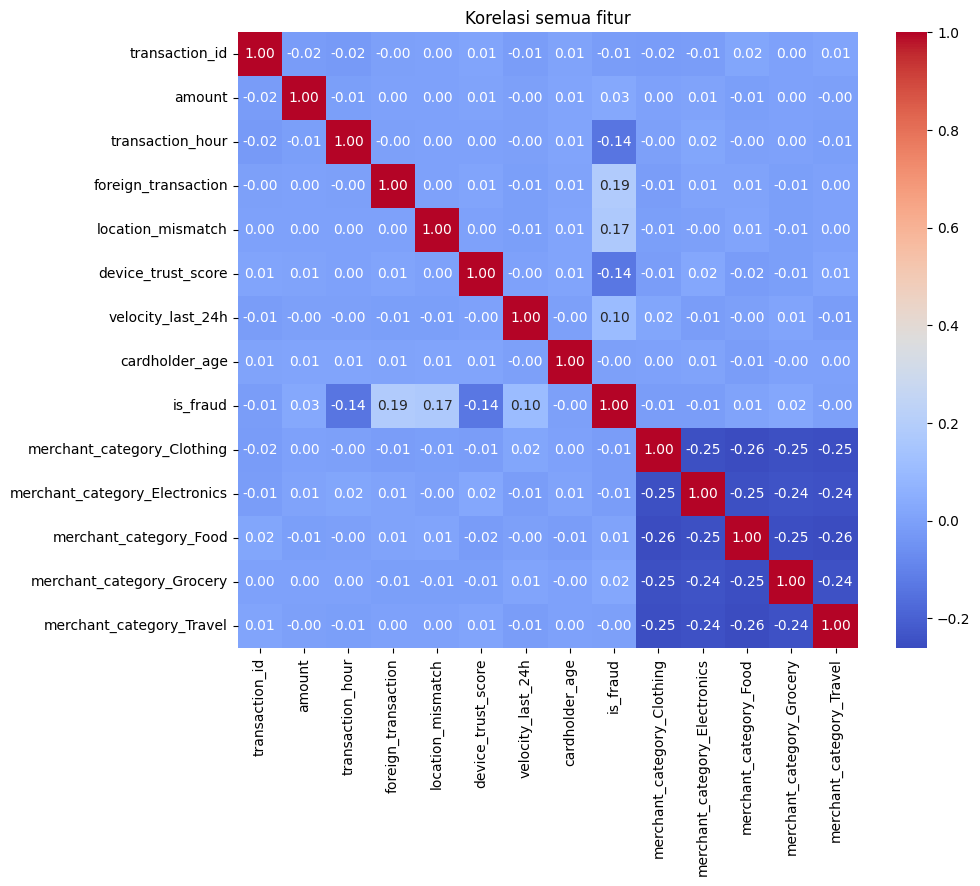

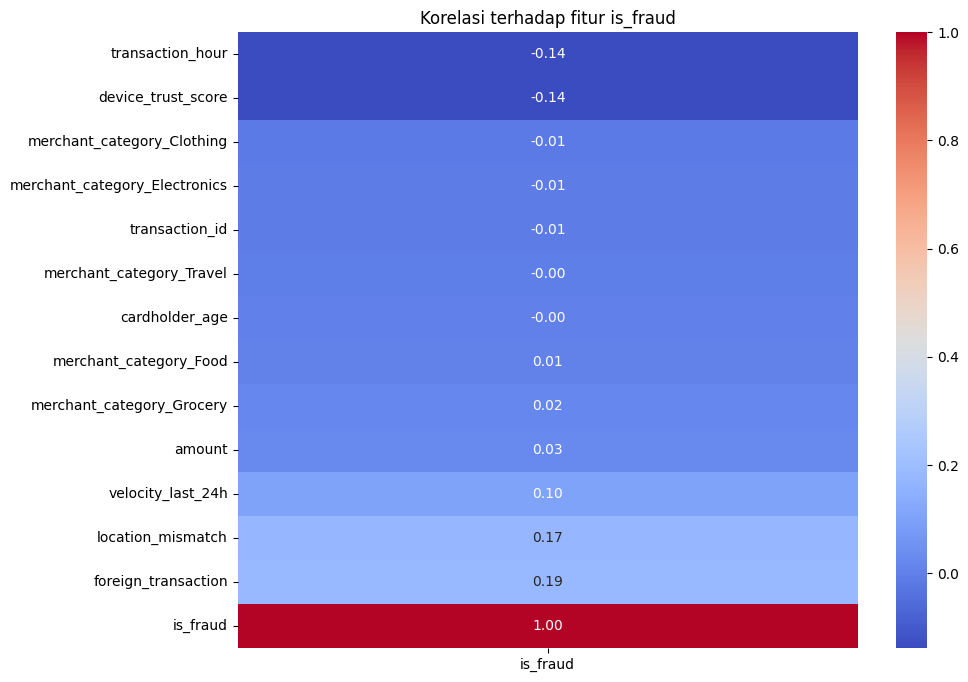

In [35]:
# Heatmap Corellation Feature
df_encoded = pd.get_dummies(df, columns=["merchant_category"])
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi semua fitur')
plt.show()

# Heatmap Corellation for is_fraud Feature
plt.figure(figsize=(10, 8))
fraud_corr = corr_matrix[['is_fraud']].sort_values(by='is_fraud')
sns.heatmap(fraud_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi terhadap fitur is_fraud')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [37]:
# Menghapus Kolom tidak berguna
df_clean = df.drop(columns=["cardholder_age", "transaction_id"])

# Pisahkan fitur (X) dan target (y)
X = df_clean.drop(columns=['is_fraud'])
y = df_clean['is_fraud']

# Definisikan pengelompokan kolom
numerical_cols = ['amount', 'transaction_hour', 'device_trust_score', 'velocity_last_24h',]
categorical_cols = ['merchant_category']
binary_cols = ['foreign_transaction', 'location_mismatch']

# Buat ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transformasi Seluruh Data
X_processed_array = preprocessor.fit_transform(X)

# Mengambil nama kolom baru (penting untuk rekonstruksi DataFrame)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
all_feature_names = numerical_cols + cat_feature_names + binary_cols

# Buat DataFrame baru dari hasil transformasi
df_final = pd.DataFrame(X_processed_array, columns=all_feature_names)

# Masukkan kembali target is_fraud
df_final['is_fraud'] = y.values

# Simpan ke CSV
df_final.to_csv('credit_card_fraud_preprocessed.csv', index=False)